In [41]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import astropy

plt.style.use('~/vedant.mplstyle')

In [7]:
h3 = Table.read('/n/holystore01/LABS/conroy_lab/Lab/h3/catalogs/rcat_V4.0.5.latest_MSG.h5')

In [9]:
for key in list(h3.columns):
    h3.rename_column(key, 'h3_' + key)

In [11]:
h3['GAIAEDR3_ID'] = h3['h3_GAIAEDR3_ID']

In [74]:
mage = Table.read('/n/holyscratch01/conroy_lab/vchandra/mage/catalogs/h3cal_rcat_V0.0_MSG.fits')

In [75]:
table = astropy.table.join(mage, h3, keys = 'GAIAEDR3_ID', join_type = 'left')

In [76]:
table['h3_Dist'] = table['h3_dist_adpt']
table['h3_Dist_err'] = table['h3_dist_adpt_err']

In [77]:
clean = (

    (table['h3_FLAG'] == 0)&
    (table['Vrot'] < 80)

)

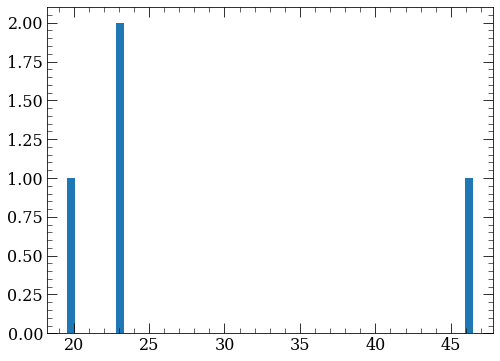

In [78]:
plt.hist(table[clean]['Vrot'], bins = 50);

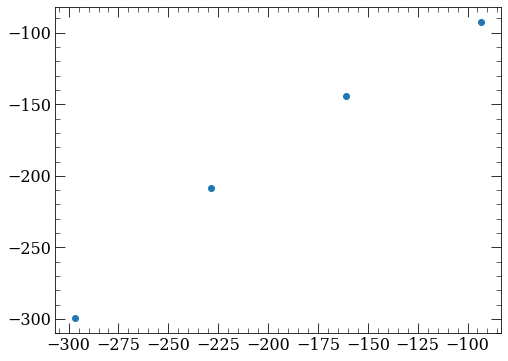

In [79]:
plt.scatter(tab['h3_Vrad'], tab['Vrad'])

In [71]:
ekw = dict(linestyle = 'none', marker = 'o', color = 'k', ecolor = 'gray', capsize = 0)
fs = 22

In [72]:
def comp(x):
    mins = np.nanmin([np.nanmin(table['h3_' + x][clean]), 
                                 np.nanmin(table[x][clean])])
    maxs = np.nanmax([np.nanmax(table['h3_' + x][clean]), 
                                 np.nanmax(table[x][clean])])
    lims = [mins - 0.1 * np.abs(mins), maxs + 0.1 * np.abs(maxs)]
    
    diff =  table[x][clean] - table['h3_' + x][clean]
    
    mad = np.median(np.abs(diff))
    bias = np.median(diff)

    plt.errorbar(table['h3_' + x][clean], table[x][clean],
                xerr = table['h3_' + x + '_err'][clean], yerr = table[x + '_err'][clean], **ekw)

    plt.plot(lims, lims, 'C3')
    plt.title('MAD: %.2f, Bias: %.2f' % (mad, bias), fontsize = fs)
    
    plt.xlim(lims)
    plt.ylim(lims)
    
    #if x == 'Dist':
    #    plt.xscale('log')
    #    plt.yscale('log')

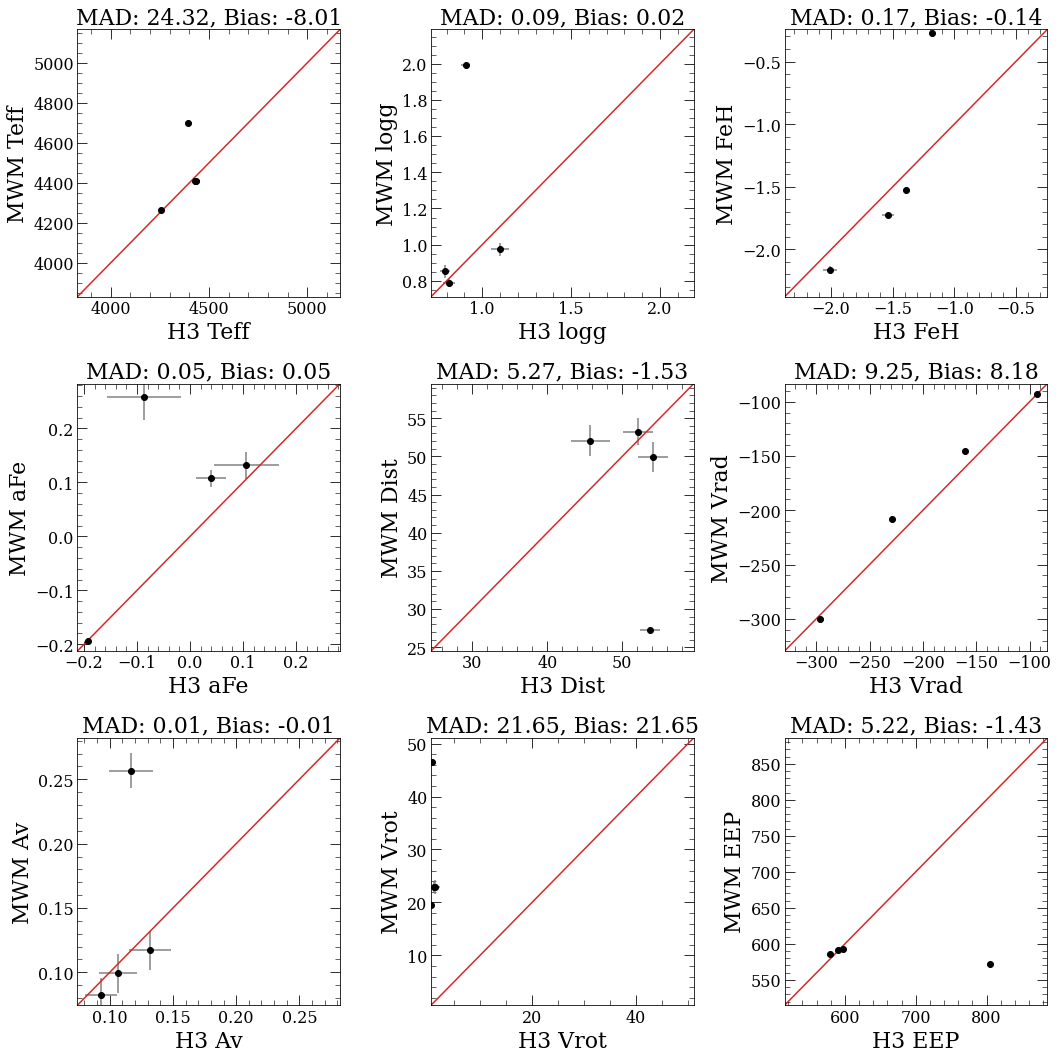

In [73]:
f,axs = plt.subplots(3,3,figsize = (15, 15))
axr = axs.ravel()

labels = ['Teff', 'logg', 'FeH', 'aFe', 'Dist', 'Vrad', 'Av', 'Vrot', 'EEP']

for ii in range(len(labels)):
    plt.sca(axr[ii])
    comp(labels[ii])
    
    plt.xlabel('H3 ' + labels[ii], fontsize = fs)
    plt.ylabel('MWM ' + labels[ii], fontsize = fs)
    
plt.tight_layout()